# Statistics in Python

*IMPRS - Using Python for Cognitive Science (2022). This tutorial is made by Noor Seijdel and based on work by [Sophie Slaats](https://www.mpi.nl/people/slaats-sophie)*

Good afternoon! Today we will be working through this tutorial to get familiar with doing statistics in Python. Important note: I am by no means a statistical advisor. I will just show you today how to use a couple of packages to do some statistical tests. Basically, I provide some pointers. When doing analyses on your own data, make your own decisions on which tests to use.
The reference guides for the packages we used in this session are here:

- [Python's statsistics](https://docs.python.org/3/library/statistics.html) 
Python’s statistics is a built-in Python library for descriptive statistics. It is not intended to be a competitor to libraries such as NumPy or SciPy or full-featured statistics packages aimed at professional statistics. It is aimed at the level of graphing and scientific calculators. 
- [Numpy](https://numpy.org/doc/stable/)
NumPy is a library for numerical computing, optimized for working with single- and multi-dimensional arrays. This library contains many routines for statistical analysis.
- [SciPy Stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
SciPy is a library for scientific computing based on NumPy. It offers additional functionality compared to NumPy, including scipy.stats for statistical analysis.
- [Statsmodels](https://www.statsmodels.org/stable/index.html) 
Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. It supports specifying models using R-style formulas and pandas DataFrames. 
- [Seaborn](https://seaborn.pydata.org/index.html) 
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- [Pandas](https://pandas.pydata.org/)
Pandas is a library for numerical computing based on NumPy. It excels in handling labeled data with DataFrame objects.



## 0. Importing modules
Today we need `math`, `statistics`, `numpy`, `pandas` and `os`.   

<font color='green'>**Exerc|ise 1:**</font> Import them below. We have added some other packages for you already.  

In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## your code here
import math
import statistics
import numpy as np
import pandas as pd
import os

## 1. Loading the data + descriptives

Let's start by getting some data to work with. We can use the participant data from a couple weeks ago! 

In [18]:
path = '/Users/mymacbookair/Documents/IMPRSPythonCourse/session7_stats'

# load the data we used previously
participants = pd.read_csv(os.path.join(path, 'participants.csv'))
participants

,first_name,last_name,age,sex,id
0,Stacy,Burton,33,male,83633
1,Jose,Griffith,23,female,82441
2,Sharon,Kemp,25,female,89186
3,Lacey,Wiggins,22,female,37321
4,Darrell,Davis,18,male,24639
5,Monique,Shah,25,male,52845
6,Brian,Floyd,22,female,73722
7,Cassandra,Anderson,18,female,59785
8,Richard,Monroe,24,female,83312
9,Natalie,Newton,23,female,90709


Okay, so that's the overview of our participants.. Now for each participant we have a separate file containing the data. Let's use a for loop to get all data in one structure. 

<font color='green'>**Exercise 2:**</font> Use a for-loop to go through the participant list and append the data from each participant to a dataframe `trials`

(Hint: we did this in the preprocessing notebook from session 5!) 


In [19]:
# use a for-loop to go through the participant list and load the data
trials = pd.DataFrame()

## your code here 
for participant_id in participants['id']:
    participant_data = pd.read_csv(f'participants/{participant_id}.csv')
    trials = trials.append(participant_data)

/var/folders/lb/w1ty6k156vl_wpbhd2yxhtkm0000gn/T/ipykernel_3675/3387387621.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
/var/folders/lb/w1ty6k156vl_wpbhd2yxhtkm0000gn/T/ipykernel_3675/3387387621.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
/var/folders/lb/w1ty6k156vl_wpbhd2yxhtkm0000gn/T/ipykernel_3675/3387387621.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
/var/folders/lb/w1ty6k156vl_wpbhd2yxhtkm0000gn/T/ipykernel_3675/3387387621.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = tria

In [20]:
trials.head(-5)

,Unnamed: 0,id,condition,RT
0,0,83633,condition_a,711.093867
1,1,83633,baseline,351.301881
2,2,83633,condition_a,720.382681
3,3,83633,condition_a,329.828212
4,4,83633,baseline,188.586183
...,...,...,...,...
110,110,90709,baseline,406.836948
111,111,90709,condition_a,405.269311
112,112,90709,condition_a,433.099059
113,113,90709,baseline,406.302224


As we've also seen before, based on their "id" we can merge the participant information with their data (note that we would actually rarely do this in real life, to keep the data anonymous). 

In [21]:
# merge participant and trial data
trials = trials.merge(participants, on='id')
trials.rename(columns={'Unnamed: 0': 'trial_order'}, inplace=True)
trials.head(-300)

,trial_order,id,condition,RT,first_name,last_name,age,sex
0,0,83633,condition_a,711.093867,Stacy,Burton,33,male
1,1,83633,baseline,351.301881,Stacy,Burton,33,male
2,2,83633,condition_a,720.382681,Stacy,Burton,33,male
3,3,83633,condition_a,329.828212,Stacy,Burton,33,male
4,4,83633,baseline,188.586183,Stacy,Burton,33,male
...,...,...,...,...,...,...,...,...
895,55,59785,condition_a,1343.532465,Cassandra,Anderson,18,female
896,56,59785,condition_b,345.353378,Cassandra,Anderson,18,female
897,57,59785,condition_b,235.146851,Cassandra,Anderson,18,female
898,58,59785,condition_b,578.310077,Cassandra,Anderson,18,female


When doing data analyses you should always check your data, to make sure no weird things are in there. Quite often, your data will contain NaN values (e.g. when a participant did not press the response button after a trial, or when they did not fill in a certain question etc.). Let's simulate such a situation by adding some NaN values to our data:

In [22]:
no_of_trials = np.shape(trials)[0]
nan_indices = np.random.permutation(no_of_trials)[0:60]
trials_NA = trials.copy()

# replace values using pd.loc: 
#function allows you to access a group of rows and columns by label(s)
trials_NA.loc[nan_indices, 'RT'] = np.nan
trials_NA.head(-5)

,trial_order,id,condition,RT,first_name,last_name,age,sex
0,0,83633,condition_a,711.093867,Stacy,Burton,33,male
1,1,83633,baseline,351.301881,Stacy,Burton,33,male
2,2,83633,condition_a,720.382681,Stacy,Burton,33,male
3,3,83633,condition_a,329.828212,Stacy,Burton,33,male
4,4,83633,baseline,188.586183,Stacy,Burton,33,male
...,...,...,...,...,...,...,...,...
1190,110,90709,baseline,406.836948,Natalie,Newton,23,female
1191,111,90709,condition_a,NaN,Natalie,Newton,23,female
1192,112,90709,condition_a,433.099059,Natalie,Newton,23,female
1193,113,90709,baseline,406.302224,Natalie,Newton,23,female


#### Look at the data summary

In [23]:
summary = trials.groupby(by='condition').aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    median_RT=pd.NamedAgg('RT', np.median),
    std_RT=pd.NamedAgg('RT', np.std),
    mean_age=pd.NamedAgg('age', np.mean)
)

summary

,mean_RT,median_RT,std_RT,mean_age
condition,,,,
baseline,481.484448,405.965007,283.582387,23.3
condition_a,759.387950,634.627644,476.263170,23.3
condition_b,452.634481,372.003101,301.176629,23.3


In [24]:
# reset the index (we've seen this before)
summary.reset_index(inplace=True)
summary

,condition,mean_RT,median_RT,std_RT,mean_age
0,baseline,481.484448,405.965007,283.582387,23.3
1,condition_a,759.387950,634.627644,476.263170,23.3
2,condition_b,452.634481,372.003101,301.176629,23.3


#### Plot the results
Now we can use seaborn to plot the results:

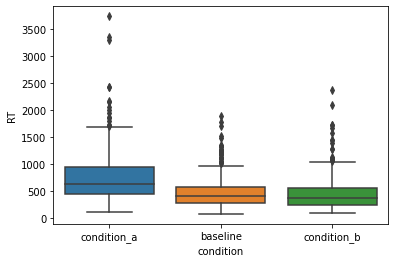

In [25]:
# as we've seen in session 5:
sns.boxplot(x='condition', y='RT', data=trials)
plt.show()

<font color='green'>**Exercise 3:**</font> Try to make a violinplot of the data

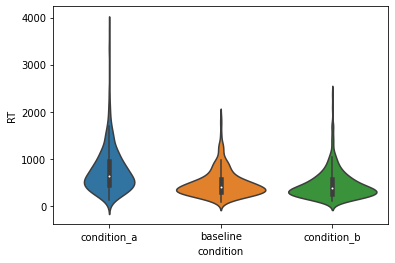

In [27]:
### your code here

sns.violinplot(x = 'condition', y = 'RT', data = trials)
plt.show()


If we compare these plots to the ones we made in session 5, it seems that our NaN values are dealt with appropriately (the plots are the same). Good to know: using Pandas's groupby-function handles your NaN-values for you. However, if you just want to get some means...


In [28]:
python_stats = statistics.mean(trials_NA["RT"])
numpy_stats = np.mean(trials_NA["RT"])

print(python_stats, numpy_stats)

nan 559.3781162686564


So when you start working with a new package or module, it is useful to first check how it deals with missing values. If you want to use python statistics, you should remove your NaN-values before computing your descriptive statistics. Fortunately there is a useful function for that: the Pandas `.dropna` function.


In [29]:
trials_dropna = trials_NA.dropna()

<font color='green'>**Exercise 4:**</font> print the mean RT of our new `trials_dropna` 

In [30]:
print(np.mean(trials_dropna['RT']))


559.3781162686564


<font color='green'>**Exercise 5:**</font> What is the mean age of our participants?

In [31]:
print(np.mean(trials["age"]))

23.3


## 2. Testing assumptions

Let's say we'd like to perform a t-test. Then we first need to check the assumptions: 

1. Scale of measurement: ordinal or continuous scale
2. Simple random sample & reasonable sample size
3. Normal distribution of dependent variables
4. Homogeneity of variance


#### 2.1 Normal distribution

Graphical methods: Plotting & evaluating




<AxesSubplot:xlabel='RT', ylabel='Count'>

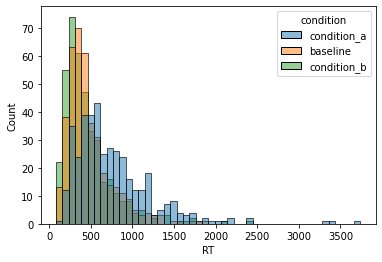

In [32]:
# Use Seaborn for a simple histogram
sns.histplot(trials, x="RT", hue="condition")

Hmm.. this is not a normal distribution; it is skewed and can be best described by an exponential. But wait - the means have to be normally distributed!


In [33]:
pmeans = trials.groupby(by=['id', 'condition']).aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    std_RT=pd.NamedAgg('RT', np.std))

pmeans.reset_index(inplace=True)
pmeans.head(5)

,id,condition,mean_RT,std_RT
0,24639,baseline,523.639055,319.469700
1,24639,condition_a,916.551797,545.207917
2,24639,condition_b,460.798286,236.760201
3,37321,baseline,424.567080,215.411905
4,37321,condition_a,603.750397,270.696958


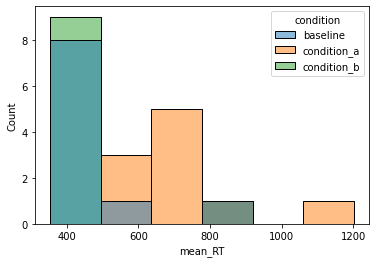

In [34]:
ax = sns.histplot(pmeans, x="mean_RT", hue="condition", kde=False)

<font color='green'>**Exercise 5:**</font> Try to plot the histogram with more bins (e.g. 20)

<AxesSubplot:xlabel='mean_RT', ylabel='Count'>

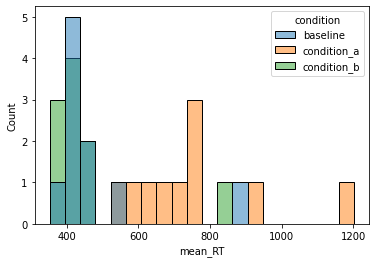

In [35]:
### your code here
sns.histplot(pmeans, x="mean_RT", hue="condition", kde=False, bins = 20)

OK, another plot. Scipy.stats.probplot generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). Probplot optionally calculates a best-fit line for the data:


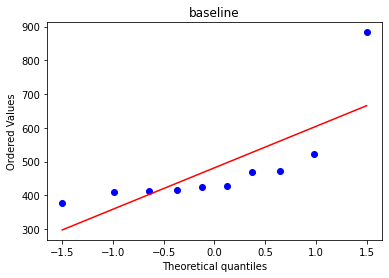

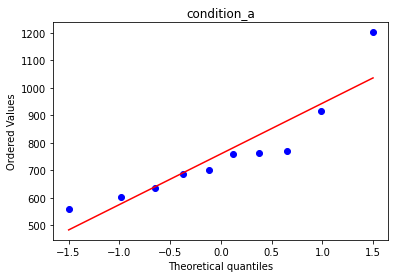

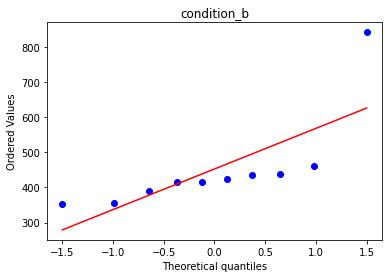

In [36]:
for cond in ['baseline', 'condition_a', 'condition_b']:
    plot = stats.probplot(pmeans.loc[pmeans['condition']==cond, 'mean_RT'], plot=plt)
    plt.title(str(cond))
    plt.show()

<font color='purple'>**To think:**</font> Why can we just use `stats.probplot`? Don't we need to indicate that we want to use SciPy?

Looking at these plots can be confusing. Let's try a statistical test: the Shapiro-Wilk test for normality.
Important to keep in mind: The Shapiro-Wilk test (or another test, Kolmogorov-Smirnov) is too sensitive when sample sizes are large.


In [37]:
# Simple shapiro test:
pmeans.groupby('condition').aggregate(stats.shapiro)

,id,mean_RT,std_RT
condition,,,
baseline,"(0.8744595646858215, 0.11263620108366013)","(0.6203631162643433, 9.681241499492899e-05)","(0.8636189699172974, 0.08417269587516785)"
condition_a,"(0.8744595646858215, 0.11263620108366013)","(0.8505376577377319, 0.05895113945007324)","(0.9184720516204834, 0.3443877696990967)"
condition_b,"(0.8744595646858215, 0.11263620108366013)","(0.6019946336746216, 5.8417390391696244e-05)","(0.719670832157135, 0.001526094158180058)"


In [38]:
shapiro_results = pmeans.groupby(by='condition').aggregate(
    shapiro=pd.NamedAgg('mean_RT',stats.shapiro))

shapiro_results.reset_index(inplace=True)
shapiro_results

,condition,shapiro
0,baseline,"(0.6203631162643433, 9.681241499492899e-05)"
1,condition_a,"(0.8505376577377319, 0.05895113945007324)"
2,condition_b,"(0.6019946336746216, 5.8417390391696244e-05)"


<font color='green'>**Exercise 6:**</font> Look at the results (and the online documentation on the test). What do you conclude?

In [ ]:
# Data not normally distributed for any alpha smaller than 0.85 which is already bigger than the common p = 0.05

## 3. Performing a T-test using SciPy

Okay, time to perform our first t-test to see if there are differences between our `condition_a` and the `baseline`. 
For this, we can use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html):

In [39]:
base = trials.loc[trials['condition']=='baseline', 'RT']
a = trials.loc[trials['condition']=='condition_a', 'RT']

stats.ttest_rel(base,a, nan_policy='raise')

Ttest_relResult(statistic=-10.9576963613722, pvalue=1.3239836124062162e-24)

Okay! So condition a seems very different from the baseline. 

<font color='green'>**Exercise 7:**</font> Write a for loop that performs a t-test for both our conditions and prints the result:


In [42]:
## your code here 
# for cond in ['condition_a', 'condition_b']:
# I did not understand the questions of  performing a t-test for both condtions. (As in, how does this differ from a t-test between condition a and condition b, in Exercise 8)

Now - do the conditions differ from each other?


<font color='green'>**Exercise 8:**</font> Perform a t-test to compare condition a and condition b: 

In [41]:
## your code here

a = trials.loc[trials['condition']=='condition_a', 'RT']
b = trials.loc[trials['condition']=='condition_b', 'RT']

stats.ttest_rel(a,b, nan_policy='raise')

Ttest_relResult(statistic=12.205167485188877, pvalue=2.4767918471337012e-29)

Of course, we should correct for multiple comparisons here. We can do this, but it would be better to use a repeated measures ANOVA. For this, we need the package Statsmodels.

## 4. Anova and LMM using Statsmodels

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.  The online documentation is hosted at [statsmodels.org](statsmodels.org).

#### Repeated Measures ANOVA



In [43]:
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

In the Statsmodels ANOVA example below we use our dataframe object, `trial`, as the first argument, followed by our dependent variable `RT`, subject identifier `id`, and the list of the independent variable, `condition`. At the end, we are getting the fit so that we can print the ANOVA table.

In [44]:
aov = AnovaRM(
    trials,
    depvar='RT',
    subject='id',
    within=['condition'],
    aggregate_func='mean'
).fit()

print(aov)

                 Anova
          F Value  Num DF  Den DF Pr > F
----------------------------------------
condition 133.4263 2.0000 18.0000 0.0000



#### Linear Mixed Models

In the early days, linear mixed models were not available in Python and one had save the data from Python, open up the data in R and run the model. Over the years, R & Python got to know each other a little better and several options have emerged for running LMM analyses in Python. Today we will use Statsmodels: 

https://www.statsmodels.org/stable/mixed_linear.html

The statsmodels imputation of linear mixed models (MixedLM) closely follows the approach outlined in Lindstrom and Bates (JASA 1988). This is also the approach followed in the R package LME4. Other packages such as Stata, SAS, etc. should also be consistent with this approach, as the basic techniques in this area are mostly mature.

Here we show how linear mixed models can be fit using the MixedLM procedure in statsmodels:

- Formula to specify the model. Here: RT ~ condition
- Data for the model. Here: trials
- Re_formula: one-sided formula defining the variance structure of the model (Default = random intercept for each group). Here: 1
- Groups: random intercept



The outcome variable is the RT, and the only predictor variable we will use here is “condition”. First we fit a model that expresses the mean RT as a function of condition, with a random intercept for each participant. The model is specified using formulas. Since the random effects structure is not specified, the default random effects structure (a random intercept for each group) is automatically used:

In [45]:
import statsmodels.formula.api as smf

lmm0 = smf.mixedlm("RT ~ condition", trials, groups = 'id', re_formula='1')
lmm0f = lmm0.fit()
print(lmm0f.summary())

                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      RT         
No. Observations:      1200         Method:                  REML       
No. Groups:            10           Scale:                   111885.7503
Min. group size:       120          Log-Likelihood:          -8679.7654 
Max. group size:       120          Converged:               Yes        
Mean group size:       120.0                                            
------------------------------------------------------------------------
                           Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------------------
Intercept                  481.484   50.806  9.477 0.000 381.906 581.063
condition[T.condition_a]   277.904   23.652 11.750 0.000 231.546 324.261
condition[T.condition_b]   -28.850   23.652 -1.220 0.223 -75.208  17.508
id Var                   23015.503   33.879                          

We can add more predictor variables by editing our formula: 

In [46]:
lmm1 = smf.mixedlm("RT ~ condition + age", trials, groups = 'id', re_formula='1')
lmm1f = lmm1.fit()
print(lmm1f.summary())

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      RT         
No. Observations:        1200         Method:                  REML       
No. Groups:              10           Scale:                   111885.7429
Min. group size:         120          Log-Likelihood:          -8676.3073 
Max. group size:         120          Converged:               Yes        
Mean group size:         120.0                                            
--------------------------------------------------------------------------
                           Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
--------------------------------------------------------------------------
Intercept                  447.344  306.739  1.458 0.145 -153.852 1048.541
condition[T.condition_a]   277.904   23.652 11.750 0.000  231.546  324.261
condition[T.condition_b]   -28.850   23.652 -1.220 0.223  -75.208   17.508
age                          1.465   12.962 

In [47]:
lmm2 = smf.mixedlm("RT ~ condition + age + condition * age", trials, groups = 'id', re_formula='1')
lmm2f = lmm2.fit()
print(lmm2f.summary())

                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        RT         
No. Observations:        1200           Method:                    REML       
No. Groups:              10             Scale:                     111960.8365
Min. group size:         120            Log-Likelihood:            -8670.4574 
Max. group size:         120            Converged:                 Yes        
Mean group size:         120.0                                                
------------------------------------------------------------------------------
                               Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
------------------------------------------------------------------------------
Intercept                      420.276  316.885  1.326 0.185 -200.807 1041.360
condition[T.condition_a]       390.342  139.794  2.792 0.005  116.350  664.333
condition[T.condition_b]       -60.085  139.794 -0.430 0.667 -334.076  21

In [48]:
lmm3 = smf.mixedlm("RT ~ condition + condition * age", trials, groups = 'id', re_formula='1')
lmm3f = lmm3.fit()
print(lmm3f.summary())



                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        RT         
No. Observations:        1200           Method:                    REML       
No. Groups:              10             Scale:                     111960.8365
Min. group size:         120            Log-Likelihood:            -8670.4574 
Max. group size:         120            Converged:                 Yes        
Mean group size:         120.0                                                
------------------------------------------------------------------------------
                               Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
------------------------------------------------------------------------------
Intercept                      420.276  316.885  1.326 0.185 -200.807 1041.360
condition[T.condition_a]       390.342  139.794  2.792 0.005  116.350  664.333
condition[T.condition_b]       -60.085  139.794 -0.430 0.667 -334.076  21

<font color='pink'>**Homework exercise**</font>

This is our final session. After today, you know how to work with Python on your own laptop, to work with GIT for code organisation (and version control), to use Python's built-in data types, functions and modules to solve tasks like renaming files or generating random lists of experimental stimuli. On top of all that, you know how to use external packages (and more importantly to solve weird annoying errors installing external packages), program a simple experiment and how to import, process and analyze experimental data. 

Now let's put that into practice! For this final homework assignment we like you to read in a dataset of choice. We ask you to create an analysis-notebook, that should contain at least:

- A nice introduction at the top, explaining what you did (in a Markdown cell)
- A table summarizing your data
- A plot of your contrast of interest
- A statistical test to determine its significance
- In between: text boxes in markdown describing what you are doing

We like you to do this in a completely new, fresh notebook.


Here we'd also like to thank you for your great efforts (and for not getting mad when we encountered so many installation errors). We really had a great time and hope you learned something useful :) . 

#### General description
Since the first experiment of my PhD project doesn't have any data yet. I decided to plot my calorie burn \* as documented by my FitBit\*\* .
The purpose of this analysis is to see if there is a difference in my personal calorie burn between weekdays and weekends.
As n=1 in this case, there will be no random slope. 

\* Which includes the calorie burned according to a rough estimation of the Basal Metabolic Rate as done by Fitbit according to the information of life style, body measurements etc. provided by me

\*\* Sleep data is what I'm more interested in, but after plotting it out in R, I'm too ashamed share it with anyonexD

In [66]:
#importing data
path = '/Users/mymacbookair/Documents/sleep'

# load the data we used previously
april = pd.read_csv(os.path.join(path, 'ActivitiesApril.csv'))
may = pd.read_csv(os.path.join(path, 'ActivitiesMay.csv'))


In [67]:
#previewing the shape
april.head(-25)
may.head(-24)

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Weekday
0,2022-05-01,1412,"4,203",1.61,4,584,184,8,0,452,N
1,2022-05-02,1339,"3,128",1.24,6,678,142,5,3,352,Y
2,2022-05-03,1378,"3,510",1.39,3,682,187,0,0,420,Y
3,2022-05-04,1450,"4,494",1.78,7,713,207,0,0,488,Y
4,2022-05-05,1450,"4,195",1.65,10,627,239,0,0,525,Y


In [68]:
#forming a new data frame from only the columns of interest
aprilCalories = april[["Calories Burned", "Weekday"]]
aprilCalories.head(-25)
mayCalories = may[["Calories Burned", "Weekday"]]

In [69]:

#adding a month label to each row in both dataframes
aprilCalories['Month'] = 'Apr'
mayCalories['Month'] = 'May'
# dplyr glimpse
aprilCalories.head(-25)

/var/folders/lb/w1ty6k156vl_wpbhd2yxhtkm0000gn/T/ipykernel_3675/1386053613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aprilCalories['Month'] = 'Apr'
/var/folders/lb/w1ty6k156vl_wpbhd2yxhtkm0000gn/T/ipykernel_3675/1386053613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayCalories['Month'] = 'May'


,Calories Burned,Weekday,Month
0,1508,Y,Apr
1,1642,N,Apr
2,1404,N,Apr
3,1489,Y,Apr
4,1394,Y,Apr


In [81]:
# "rbind" both dataframes
fulldf = pd.concat([aprilCalories, mayCalories])

#renaming the column of interest to remove the pesky space 
fulldf.rename(columns = {'Calories Burned':'Burn'}, inplace = True)


In [82]:
#some summary
summaryCals = fulldf.groupby(by='Weekday').aggregate(
    mean_Cals=pd.NamedAgg('Burn', np.mean),
    median_Cals=pd.NamedAgg('Burn', np.median),
    std_Cals=pd.NamedAgg('Burn', np.std)
)

summaryCals

,mean_Cals,median_Cals,std_Cals
Weekday,,,
N,1606.888889,1546.5,282.379571
Y,1446.463415,1438.0,67.183740


#### Shapiro test checking assumptions

In [83]:
shapiro_results = fulldf.groupby(by='Weekday').aggregate(
    shapiro=pd.NamedAgg('Burn',stats.shapiro))

shapiro_results.reset_index(inplace=True)
shapiro_results

,Weekday,shapiro
0,N,"(0.9184366464614868, 0.12128739804029465)"
1,Y,"(0.9176459312438965, 0.005741794593632221)"


Normal on weekdays, not so normal on weekends
### Linear Mixed Models
(not really mixed)

In [84]:
lmmCals = smf.mixedlm("Burn ~ Weekday", fulldf, groups = 'Month', re_formula='1')
lmmCals = lmmCals.fit()
print(lmmCals.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  Burn      
No. Observations:   59       Method:              REML      
No. Groups:         2        Scale:               26943.4310
Min. group size:    29       Log-Likelihood:      inf       
Max. group size:    30       Converged:           Yes       
Mean group size:    29.5                                    
------------------------------------------------------------
              Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
------------------------------------------------------------
Intercept       0.000                                       
Weekday[T.Y] -160.369   46.414 -3.455 0.001 -251.339 -69.398
Month Var       0.000                                       



/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.9/site-packages/statsmodels/regress

### Conclusion:

Statistically less burns on weekdays than on weekends for both months.